## **MOHD NAZRI NAWI**
### **MAN202171**
### **MANB1153 - Data Mining**


## **Meeting 4 Assignment**

Using the dataset provided in elearning, perform these tasks:


1.   Upload the data using pandas dataframe function, make sure the dataframe has the date as the index, and sales is the target value
2. Perform a few steps of EDA
2.   Show 2 examples of accessing a row of certain dates
3.   Create a column on the dataframe that calculate rolling mean based on sales number
4. Using Linear Regression, fit a model to forecast the sales. 











In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **1.0 Upload the data using pandas dataframe function, with date as the index, and sales is the target value**

In [2]:
# Import libraries and load the data

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales.csv', parse_dates=['date'],index_col='date')
##.drop(['id','store_nbr','family','onpromotion'], axis=1) 


### **2.0 Perform Exploratory Data Analysis(EDA)** 

In [3]:
# Check for info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3000888 entries, 2013-01-01 to 2017-08-15
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 137.4+ MB


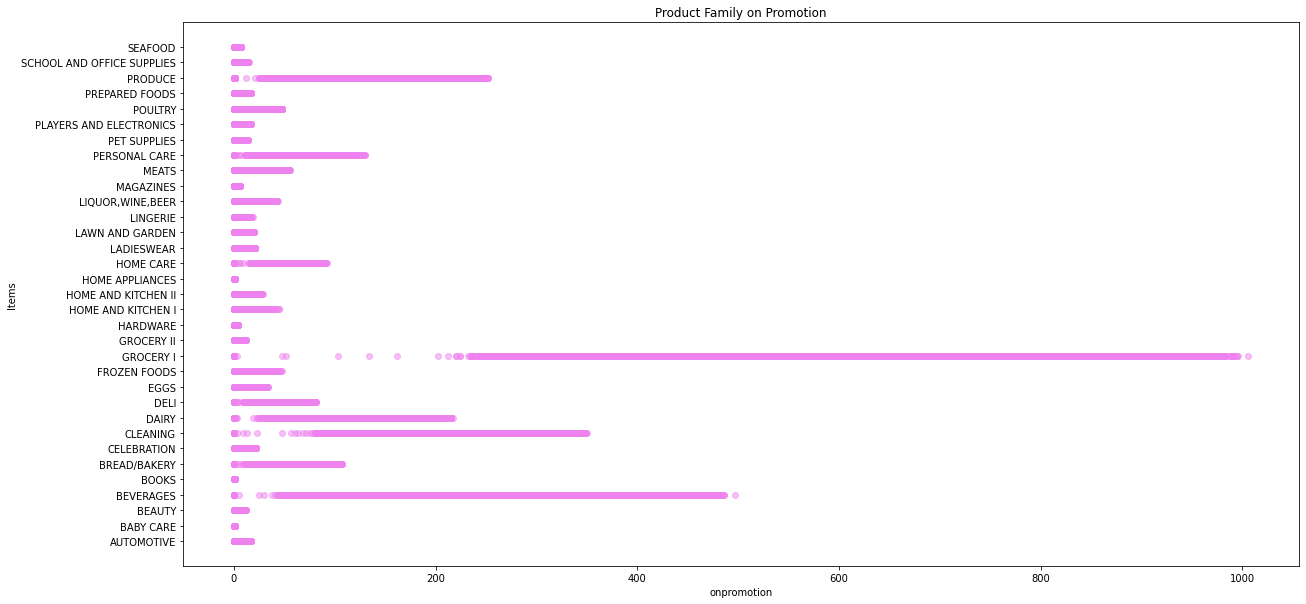

In [4]:
plt.figure(figsize=[20,10])
plt.scatter(df['onpromotion'], df['family'], color = 'violet',alpha=0.5)
plt.title('Product Family on Promotion')
plt.xlabel('onpromotion')
plt.ylabel('Items')
plt.show()

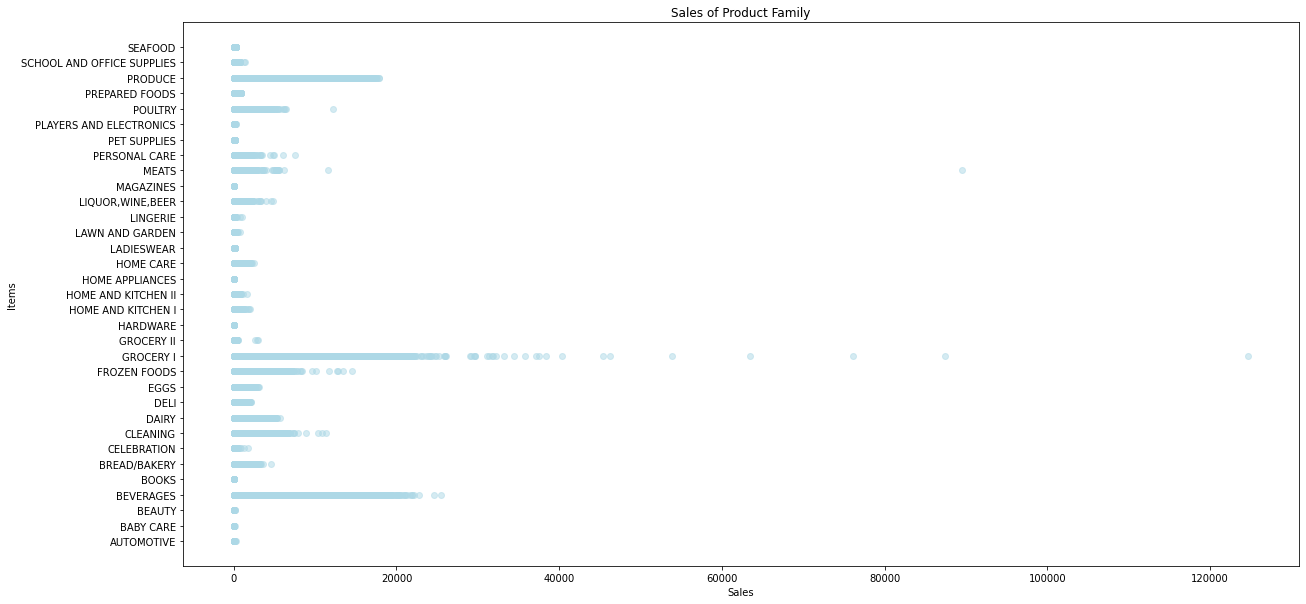

In [5]:
plt.figure(figsize=[20,10])
plt.scatter(df['sales'], df['family'],color = 'lightblue',alpha=0.5)
plt.title('Sales of Product Family')
plt.xlabel('Sales')
plt.ylabel('Items')
plt.show()

In [6]:
df.head()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-01,0,1,AUTOMOTIVE,0.0,0.0
2013-01-01,1,1,BABY CARE,0.0,0.0
2013-01-01,2,1,BEAUTY,0.0,0.0
2013-01-01,3,1,BEVERAGES,0.0,0.0
2013-01-01,4,1,BOOKS,0.0,0.0


In [7]:
df.tail()

,id,store_nbr,family,sales,onpromotion
date,,,,,
2017-08-15,3000883,9,POULTRY,438.133,15.0
2017-08-15,3000884,9,PREPARED FOODS,154.553,8.0
2017-08-15,3000885,9,PRODUCE,2419.729,148.0
2017-08-15,3000886,9,SCHOOL AND OFFICE SUPPLIES,121.000,10.0
2017-08-15,3000887,9,SEAFOOD,16.000,2.0


In [8]:
# View the data statistics
df.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,3.460289e+01
std,8.662819e+05,1.558579e+01,1.101998e+03,9.948216e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,1.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,1.600000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,1.006000e+03


###**3.0 Example of Accessing Row of Certain Date**

In [9]:
## 1.0 Example 1

df[df.index.day == 10]

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-01-10,16038,1,AUTOMOTIVE,2.00000,0.0
2013-01-10,16039,1,BABY CARE,0.00000,0.0
2013-01-10,16040,1,BEAUTY,3.00000,0.0
2013-01-10,16041,1,BEVERAGES,847.00000,0.0
2013-01-10,16042,1,BOOKS,0.00000,0.0
...,...,...,...,...,...
2017-08-10,2991973,9,POULTRY,291.82098,22.0
2017-08-10,2991974,9,PREPARED FOODS,111.93000,8.0
2017-08-10,2991975,9,PRODUCE,1036.43900,133.0


In [10]:
## 1.0 Example 2

df['2013-04-01':'2013-06-01']

,id,store_nbr,family,sales,onpromotion
date,,,,,
2013-04-01,160380,1,AUTOMOTIVE,0.000,0.0
2013-04-01,160381,1,BABY CARE,0.000,0.0
2013-04-01,160382,1,BEAUTY,1.000,0.0
2013-04-01,160383,1,BEVERAGES,931.000,0.0
2013-04-01,160384,1,BOOKS,0.000,0.0
...,...,...,...,...,...
2013-06-01,270859,9,POULTRY,709.914,0.0
2013-06-01,270860,9,PREPARED FOODS,79.000,0.0
2013-06-01,270861,9,PRODUCE,0.000,0.0


<function matplotlib.pyplot.show>

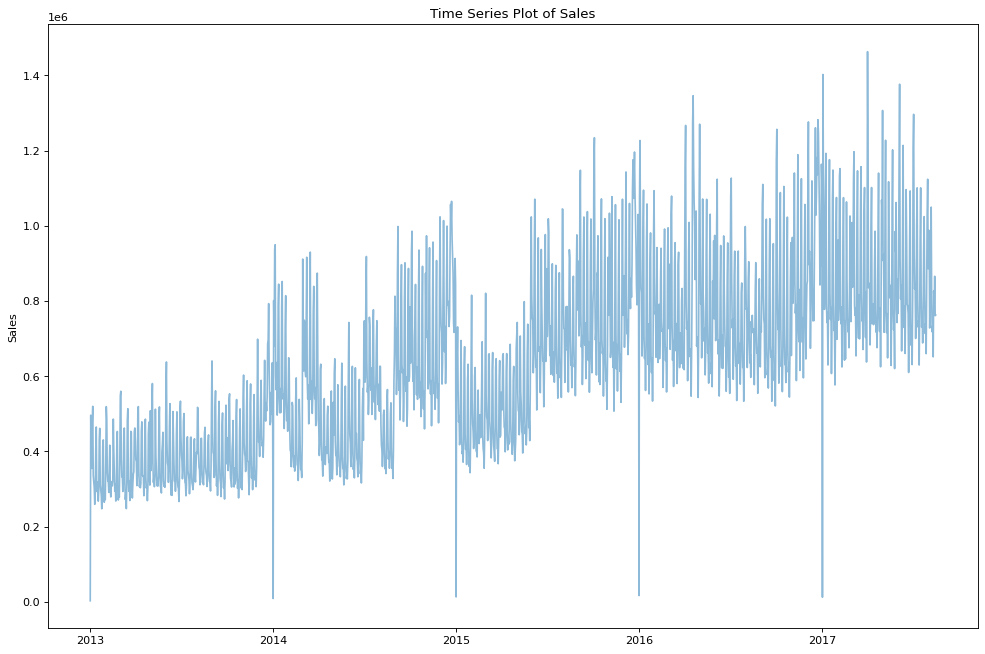

In [22]:
# Viewing time plot of sales data

from matplotlib.pyplot import figure
figure(figsize=(15, 10), dpi=80)

plt.plot(df.sales, alpha = 0.5)
plt.ylabel("Sales")
plt.title("Time Series Plot of Sales")
plt.show

### **4.0 Create a column on the dataframe that calculate rolling mean based on sales number**

In [12]:
# Calculate rolling mean for sales (daily average)
df= df.groupby('date')['sales'].sum()
df = df.to_frame() 
df['rolling average'] = df.rolling(2).mean()
print(df)

                    sales  rolling average
date                                      
2013-01-01    2511.618999              NaN
2013-01-02  496092.417944    249302.018472
2013-01-03  361461.231124    428776.824534
2013-01-04  354459.677093    357960.454108
2013-01-05  477350.121229    415904.899161
...                   ...              ...
2017-08-11  826373.722022    738880.316996
2017-08-12  792630.535079    809502.128550
2017-08-13  865639.677471    829135.106275
2017-08-14  760922.406081    813281.041776
2017-08-15  762661.935939    761792.171010

[1684 rows x 2 columns]


In [13]:
df = df.copy()

df['Time'] = np.arange(len(df.index))
df.head()

,sales,rolling average,Time
date,,,
2013-01-01,2511.618999,NaN,0
2013-01-02,496092.417944,249302.018472,1
2013-01-03,361461.231124,428776.824534,2
2013-01-04,354459.677093,357960.454108,3
2013-01-05,477350.121229,415904.899161,4


In [14]:
df.describe()

,sales,rolling average,Time
count,1.684000e+03,1.683000e+03,1684.000000
mean,6.375564e+05,6.377079e+05,841.500000
std,2.344102e+05,2.201414e+05,486.273243
min,2.511619e+03,2.493020e+05,0.000000
25%,4.427115e+05,4.440819e+05,420.750000
50%,6.321889e+05,6.369470e+05,841.500000
75%,7.859455e+05,7.875582e+05,1262.250000
max,1.463084e+06,1.308877e+06,1683.000000


###**5.0 Using Linear Regression, fit a model to forecast the sales**

In [15]:
# Training data
X = df.loc[:, ['Time']]  # features
y = df.loc[:, 'sales']  # target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as
# the training data
y_pred = pd.Series(model.predict(X), index=X.index)
y_pred

date
2013-01-01    346122.832091
2013-01-02    346469.158357
2013-01-03    346815.484623
2013-01-04    347161.810889
2013-01-05    347508.137155
                  ...      
2017-08-11    927604.632682
2017-08-12    927950.958948
2017-08-13    928297.285214
2017-08-14    928643.611480
2017-08-15    928989.937746
Length: 1684, dtype: float64

In [16]:
# Print R^2 
print(model.score(X,y))

0.5161529745128403


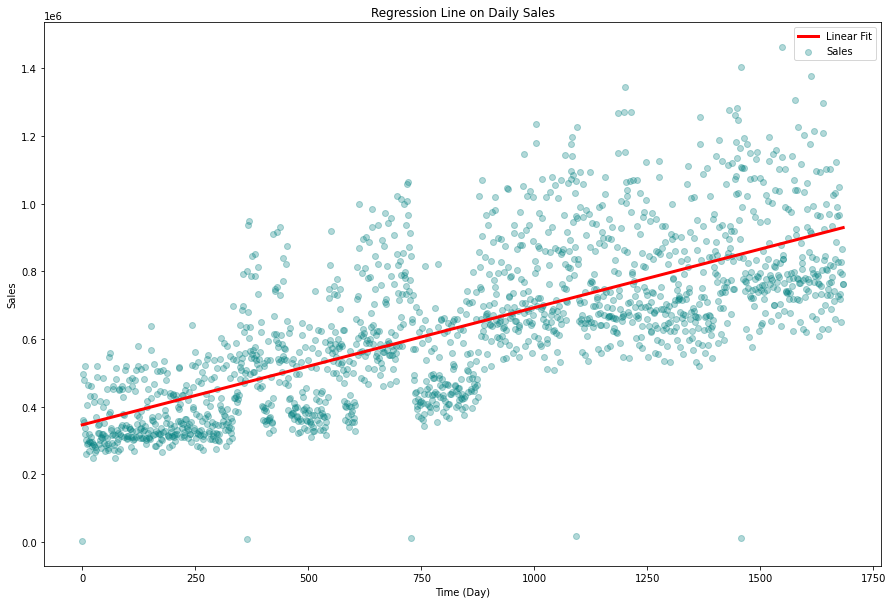

In [21]:
# Visualization of Regression Line on Sales 

plt.figure(figsize=[15,10])
plt.scatter(X, y, label = 'Sales',color='teal', alpha=0.3)
plt.plot(X, y_pred, label = 'Linear Fit', color = 'red', linewidth = 3)
plt.title('Regression Line on Daily Sales')
plt.xlabel('Time (Day)')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [18]:
# RSME Calculation


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y2_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y2_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.5240938412211443
Root Mean Squared Error: 162258.49365274925
